# Plotly and Cufflinks

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

**NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work.**

**Note: Maybe the Github repo will not show the `Plotly library` results of the plots creation code, but if you follow the instructions and run the scripts locally they will all be shown correctly to your local machine.**

## Imports and Set-up

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#### So plotly as a company can support the charts online and can host your online data visualizations.
#### But now we want to use plotly OFFLINE as an open source tool. So, we do some imports from plotly.offline 

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

3.7.1


In [3]:
import cufflinks as cf

In [4]:
# For Notebooks (i.e. in order to work on Notebook >> connects the JavaScript to your Notebook
# It actually connects pandas and Pythons to a JavaScript library)
init_notebook_mode(connected=True)

#### For offline plot creation with plotly you have to use cufflinks (and then plotly)

In [5]:
cf.go_offline()

### Fake Data

In [6]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())  # split() cause we want a list of A,B,C,D

In [7]:
df.head()

,A,B,C,D
0,0.429591,-0.433699,-0.464408,0.779319
1,0.106645,0.659677,-0.959851,0.125454
2,1.008232,-0.859460,0.235441,0.564230
3,-1.251771,3.083705,0.324888,-0.532003
4,-0.584860,-1.255851,-1.287400,-0.441524


In [8]:
df2 = pd.DataFrame({'Category':['A','B','C'],'Values':[32,43,50]})

In [9]:
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


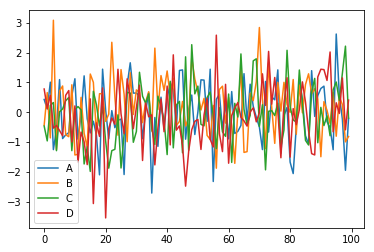

In [10]:
df.plot()

## Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

In [11]:
df.iplot()  # click and drag to zoom in, doubli click to zoom out

## Scatter

In [12]:
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=10) 
# by default the scatter plot will be designed with connected lines and not dots. 
# So, we pass in the argument: mode='markers' to create dots | size argument is used to change the size of the markers 

## Bar plots

In [13]:
df2.iplot(kind='bar', x='Category', y='Values')

In [14]:
df.head()

,A,B,C,D
0,0.429591,-0.433699,-0.464408,0.779319
1,0.106645,0.659677,-0.959851,0.125454
2,1.008232,-0.859460,0.235441,0.564230
3,-1.251771,3.083705,0.324888,-0.532003
4,-0.584860,-1.255851,-1.287400,-0.441524


### You can use groupby functions to create various barp lots

In [15]:
df.count()

A    100
B    100
C    100
D    100
dtype: int64

In [16]:
df.count().iplot(kind='bar')

In [17]:
df.sum()

A    -3.527474
B    21.615378
C    -6.476517
D   -14.759313
dtype: float64

In [18]:
df.sum().iplot(kind='bar')

## Boxplots

In [19]:
df.head()

,A,B,C,D
0,0.429591,-0.433699,-0.464408,0.779319
1,0.106645,0.659677,-0.959851,0.125454
2,1.008232,-0.859460,0.235441,0.564230
3,-1.251771,3.083705,0.324888,-0.532003
4,-0.584860,-1.255851,-1.287400,-0.441524


In [20]:
df.iplot(kind='box')

## 3d Surface

In [21]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3

,x,y,z
0,1,10,5
1,2,20,4
2,3,30,3
3,4,20,2
4,5,10,1


In [22]:
df3.iplot(kind='surface')

In [23]:
df3.iplot(kind='surface',colorscale='rdylbu')  # adding colorscale argument
# colorscales names can be found here: https://plot.ly/ipython-notebooks/color-scales/


#### colorscales names can be found here: https://plot.ly/ipython-notebooks/color-scales/

## histogram

In [24]:
df['A'].iplot(kind='hist',bins=25)

In [25]:
# passing all datafram >> It creates an overlapping histogram with all the columns (you can compare the columns too!)
df.iplot(kind='hist')

## Spread (used for stock data, to compare stocks)

In [26]:
df[['A', 'B']].head()

,A,B
0,0.429591,-0.433699
1,0.106645,0.659677
2,1.008232,-0.859460
3,-1.251771,3.083705
4,-0.584860,-1.255851


In [27]:
df[['A', 'B']].iplot(kind='spread')

## Bubble plot
 
#### very similar to a scatter plot, except the pints change size which based on anothe variable
(these are quite common plots especially for things like United Nations reports)

In [28]:
df.iplot(kind='bubble',x='A',y='B',size='C')  # here the size of the bubbles is based on column C

## scatter_matrix()

Similar to sns.pairplot()

In [29]:
df.scatter_matrix()  # use this plot in care for very large datasets otherwise you may have a crash in Python Kernel